In [1]:
%pylab inline
import pylab as pb
pylab.ion()
import GPy

Populating the interactive namespace from numpy and matplotlib


In [23]:
def f_low(x):
    return np.sin(8*np.pi*x)

def f_high(x):
    return (x-np.sqrt(2)) * (f_low(x))**2

num_cheap = 30
num_expensive = 10

np.random.seed(59)
X1 = np.random.rand(num_cheap)[:,None]
#X2 = np.linspace(0,1,num_expensive)[:,None]
X2 = np.random.rand(num_expensive)[:,None]

Yc = f_low(X1) + 0.01 * np.random.normal(0,1,num_cheap)[:,None]

Ye = f_high(X2) + 0.001 * np.random.normal(0,1,num_expensive)[:,None]

In [24]:
K1 = GPy.kern.Bias(1)
K2 = GPy.kern.Linear(1)
K3 = GPy.kern.Matern32(1)
lcm = GPy.util.multioutput.LCM(input_dim=1,num_outputs=2,kernels_list=[K1,K2,K3])

m = GPy.models.GPCoregionalizedRegression([X1,X2],[Yc,Ye],kernel=lcm)
m['.*ICM.*var'].unconstrain()
m['.*ICM0.*var'].constrain_fixed(1.)
m['.*ICM0.*W'].constrain_fixed(0)
m['.*ICM1.*var'].constrain_fixed(1.)
m['.*ICM1.*W'].constrain_fixed(0)
m.optimize()

In [25]:
print(m)


Name : gp
Objective : 34.89698065237715
Number of Parameters : 18
Number of Optimization Parameters : 12
Updates : True
Parameters:
  gp.                                    |                value  |  constraints  |  priors
  sum.ICM0.bias.variance                 |                  1.0  |     fixed     |        
  sum.ICM0.B.W                           |               (2, 1)  |     fixed     |        
  sum.ICM0.B.kappa                       |                 (2,)  |      +ve      |        
  sum.ICM1.linear.variances              |                  1.0  |     fixed     |        
  sum.ICM1.B.W                           |               (2, 1)  |     fixed     |        
  sum.ICM1.B.kappa                       |                 (2,)  |      +ve      |        
  sum.ICM2.Mat32.variance                |   0.9503976784780398  |               |        
  sum.ICM2.Mat32.lengthscale             |  0.49569572528640005  |      +ve      |        
  sum.ICM2.B.W                           |      

In [26]:
def plot_2outputs(m,xlim,ylim):
    fig = pb.figure(figsize=(12,8))
    #Output 1
    ax1 = fig.add_subplot(211)
    ax1.set_xlim(xlim)
    ax1.set_title('Output 1')
    m.plot(plot_limits=xlim,fixed_inputs=[(1,0)],which_data_rows=slice(0,num_cheap),ax=ax1)
    #m.plot(plot_limits=xlim,fixed_inputs=[(1,0)],ax=ax1)
    ax1.plot(Xt1[:,:1],Yt1,'rx',mew=1.5)
    #Output 2
    ax2 = fig.add_subplot(212)
    ax2.set_xlim(xlim)
    ax2.set_title('Output 2')
    m.plot(plot_limits=xlim,fixed_inputs=[(1,1)],which_data_rows=slice(num_cheap,num_cheap+num_expensive),ax=ax2)
    #m.plot(plot_limits=xlim,fixed_inputs=[(1,1)],ax=ax2)
    ax2.plot(Xt2[:,:1],Yt2,'rx',mew=1.5)


In [27]:
Xt1 = np.random.rand(100)[:,None]*1.2
Xt2 = np.random.rand(100)[:,None]*1.2

Yt1 = f_low(Xt1)
Yt2 = f_high(Xt2)

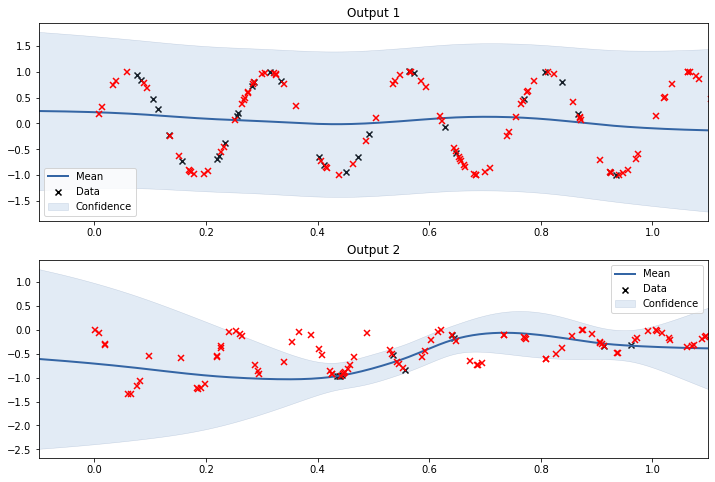

In [28]:
plot_2outputs(m,xlim=(-0.1,1.1),ylim=(-2,2))